In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Dataset
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
def analytical_solution(x, y):
    n = len(x)
    X = np.vstack((np.ones(n), x)).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [3]:

beta_analytical = analytical_solution(x, y)
print("Analytical Solution Coefficients:", beta_analytical)


y_pred_analytical = beta_analytical[0] + beta_analytical[1] * x
def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

Analytical Solution Coefficients: [1.23636364 1.16969697]


In [5]:
# Compute R-squared (R²)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


sse_analytical = sse(y, y_pred_analytical)
r2_analytical = r2_score(y, y_pred_analytical)

In [6]:

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    n = len(x)
    X = np.vstack((np.ones(n), x)).T
    theta = np.zeros(2)
    cost_history = []

    for _ in range(iterations):
        gradients = (-2 / n) * X.T @ (y - (X @ theta))
        theta -= learning_rate * gradients
        cost_history.append(sse(y, X @ theta))

    return theta, cost_history

theta_gd, cost_history_gd = gradient_descent(x, y)
print("Full-Batch Gradient Descent Coefficients:", theta_gd)

Full-Batch Gradient Descent Coefficients: [1.23280995 1.17026369]


In [7]:


def stochastic_gradient_descent(x, y, learning_rate=0.01, iterations=100):
    n = len(x)
    X = np.vstack((np.ones(n), x)).T
    theta = np.zeros(2)
    cost_history = []

    for _ in range(iterations):
        for i in range(n):
            xi = X[i, :]
            yi = y[i]
            gradients = (-2) * xi.T * (yi - (xi @ theta))
            theta -= learning_rate * gradients
            cost_history.append(sse(y, X @ theta))

    return theta, cost_history

theta_sgd, cost_history_sgd = stochastic_gradient_descent(x, y)
print("Stochastic Gradient Descent Coefficients:", theta_sgd)

Stochastic Gradient Descent Coefficients: [0.89413984 1.29894648]


In [8]:
y_pred_gd = theta_gd[0] + theta_gd[1] * x
y_pred_sgd = theta_sgd[0] + theta_sgd[1] * x


sse_gd = sse(y, y_pred_gd)
r2_gd = r2_score(y, y_pred_gd)
sse_sgd = sse(y, y_pred_sgd)
r2_sgd = r2_score(y, y_pred_sgd)

print("\nFull-batch Gradient Descent:")
print("SSE:", sse_gd)
print("R²:", r2_gd)

print("\nStochastic Gradient Descent:")
print("SSE:", sse_sgd)
print("R²:", r2_sgd)


Full-batch Gradient Descent:
SSE: 5.624278989977716
R²: 0.9525377300423822

Stochastic Gradient Descent:
SSE: 7.575559791810393
R²: 0.9360712253855663


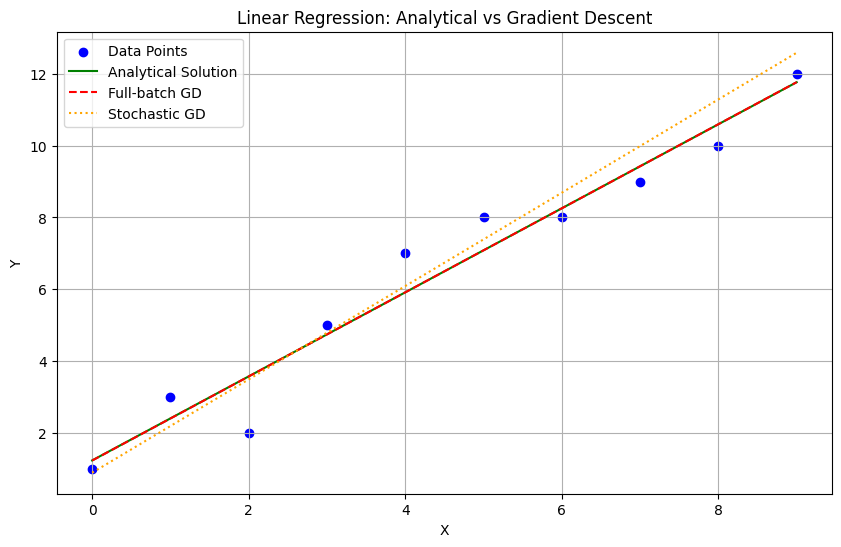

In [9]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')

plt.plot(x, y_pred_analytical, color='green', label='Analytical Solution')
plt.plot(x, y_pred_gd, color='red', linestyle='--', label='Full-batch GD')
plt.plot(x, y_pred_sgd, color='orange', linestyle=':', label='Stochastic GD')

plt.title("Linear Regression: Analytical vs Gradient Descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()